# Name : Sunita Samantasinghar
### Post Graduate Program in Artificial Intelligence and Machine Learning
2022-2023

# Supervised Learning Project
## Part A
### • CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
### • DATA DESCRIPTION:
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

#### IMPORT ALL THE REQUIRED PACKAGES

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from numpy import percentile as percentile
from numpy.random import rand
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB, BernoulliNB,CategoricalNB,ComplementNB

#### Part 1. 1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

#### Dataframe 1

In [2]:
df1=pd.read_csv(r'C:\Users\Datta\Downloads\Part1+-+Normal.csv')
df1.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

#### Dataframe 2

In [3]:
df2=pd.read_csv(r'C:\Users\Datta\Downloads\Part1+-+Type_H.csv')
df2.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

#### Dataframe 3

In [4]:
df3=pd.read_csv(r'C:\Users\Datta\Downloads\Part1+-+Type_S.csv')
df3.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

#### Part 1.1 b - Print Shape and columns of all the 3 DataFrames.

In [5]:
#Shape of the dataset df1
df1.shape

(100, 7)

In [6]:
#Columns of the dataset df1
df1.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [7]:
#Shape of the dataset df2
df2.shape

(60, 7)

In [8]:
#Columns of the dataset df2
df2.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [9]:
#Shape of the dataset df3
df3.shape

(150, 7)

In [10]:
#Columns of the dataset df3
df3.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

#### Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations

In [13]:
def compare(df1, df2):
    orig = set(df1.columns)
    
    c = set(df2.columns)

    #testing if length of set is same like length of columns names
    if len(c) != len(df1.columns):
        return ('extra columns in dataframe')
    #if same sets
    elif (c == orig):
        return ('identical columns name')
    #compared subsets
    elif c.issubset(orig):
        return ('missing columns in dataframe')
    #compared subsets
    elif orig.issubset(c):
        return ('extra columns in dataframe')
    else:
        return ('columns names are incorrect')

print(compare(df1, df2))                  

identical columns name


In [14]:
def compare(df1, df3):
    orig = set(df1.columns)
    
    c = set(df3.columns)

    #testing if length of set is same like length of columns names
    if len(c) != len(df1.columns):
        return ('extra columns in dataframe')
    #if same sets
    elif (c == orig):
        return ('identical columns name')
    #compared subsets
    elif c.issubset(orig):
        return ('missing columns in dataframe')
    #compared subsets
    elif orig.issubset(c):
        return ('extra columns in dataframe')
    else:
        return ('columns names are incorrect')

print(compare(df1, df3))   

identical columns name


In [15]:
def compare(df2, df3):
    orig = set(df2.columns)
    
    c = set(df3.columns)

    #testing if length of set is same like length of columns names
    if len(c) != len(df1.columns):
        return ('extra columns in dataframe')
    #if same sets
    elif (c == orig):
        return ('identical columns name')
    #compared subsets
    elif c.issubset(orig):
        return ('missing columns in dataframe')
    #compared subsets
    elif orig.issubset(c):
        return ('extra columns in dataframe')
    else:
        return ('columns names are incorrect')

print(compare(df2, df3))   

identical columns name


**NOTE : All the columns are identical in all dataframes.**

#### Part 1.1 d - Print DataTypes of all the 3 DataFrames.

In [16]:
#Data Types of the dataframe df1
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [17]:
#Data Types of the dataframe df2
df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [18]:
#Data Types of the dataframe df3
df3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

#### Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

This below method is used to get the frequency counts of values in one column.

In [19]:
df1['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [20]:
df2['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [21]:
df3['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

#### Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [22]:
df1.loc[df1['Class']=='Nrmal','Class']='normal'
df1.loc[df1['Class']=='Normal','Class']='normal'
df2.loc[df2['Class']=='type_h','Class']='type_h'
df2.loc[df2['Class']=='Type_H','Class']='type_h'
df3.loc[df3['Class']=='tp_s','Class']='type_s'
df3.loc[df3['Class']=='Type_S','Class']='type_s'

In [23]:
print(df1)

    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0     38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  normal
1     54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  normal
2     44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  normal
3     48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  normal
4     45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  normal
..          ...        ...        ...        ...         ...       ...     ...
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214750  normal
99    33.841641   5.073991  36.641233  28.767649  123.945244 -0.199249  normal

[100 rows x 7 columns]


In [24]:
df2

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
0     63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1     39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2     68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3     69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4     49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
5     40.250200  13.921907  25.124950  26.328293  130.327871   2.230652   
6     53.432928  15.864336  37.165934  37.568592  120.567523   5.988551   
7     45.366754  10.755611  29.038349  34.611142  117.270067 -10.675871   
8     43.790190  13.533753  42.690814  30.256437  125.002893  13.289018   
9     36.686353   5.010884  41.948751  31.675469   84.241415   0.664437   
10    49.706610  13.040974  31.334500  36.665635  108.648265  -7.825986   
11    31.232387  17.715819  15.500000  13.516568  120.055399   0.499751   
12    48.915551  19.964556  40.263794  28.950995  119.321358   8.028895   
13    53.572170  20.460828  33.100000  33.111342  110.966698   7.044803   
14    57.300227  24.188885  47.000000  33.111342  116.806587   5.766947   
15    44.318907  12.537992  36.098763  31.780915  124.115836   5.415825   
16    63.834982  20.362507  54.552434  43.472475  112.309491  -0.622527   
17    31.276012   3.144669  32.562996  28.131342  129.011418   3.623020   
18    38.697912  13.444749  31.000000  25.253163  123.159251   1.429186   
19    41.729963  12.254074  30.122586  29.475889  116.585706  -1.244402   
20    43.922840  14.177959  37.832547  29.744881  134.461016   6.451648   
21    54.919443  21.062332  42.200000  33.857110  125.212716   2.432561   
22    63.073611  24.413803  54.000000  38.659808  106.424329  15.779697   
23    45.540790  13.069598  30.298321  32.471192  117.980830  -4.987130   
24    36.125683  22.758753  29.000000  13.366931  115.577116  -3.237562   
25    54.124920  26.650489  35.329747  27.474432  121.447011   1.571205   
26    26.147921  10.759454  14.000000  15.388468  125.203296 -10.093108   
27    43.580964  16.508884  47.000000  27.072080  109.271634   8.992816   
28    44.551012  21.931147  26.785916  22.619865  111.072920   2.652321   
29    66.879211  24.891999  49.278597  41.987212  113.477018  -2.005892   
30    50.819268  15.402213  42.528939  35.417055  112.192804  10.869566   
31    46.390260  11.079047  32.136553  35.311213   98.774546   6.386832   
32    44.936675  17.443838  27.780576  27.492837  117.980324   5.569620   
33    38.663257  12.986441  40.000000  25.676816  124.914118   2.703008   
34    59.595540  31.998244  46.560252  27.597296  119.330354   1.474286   
35    31.484218   7.826221  24.284818  23.657997  113.833145   4.393080   
36    32.090987   6.989378  35.998198  25.101609  132.264735   6.413428   
37    35.703458  19.443253  20.700000  16.260205  137.540613  -0.263490   
38    55.843286  28.847448  47.690543  26.995838  123.311845   2.812427   
39    52.419385  19.011561  35.872660  33.407825  116.559771   1.694705   
40    35.492446  11.701672  15.590363  23.790774  106.938852  -3.460358   
41    46.442078   8.395036  29.037230  38.047043  115.481405   2.045476   
42    53.854798  19.230643  32.779060  34.624155  121.670915   5.329843   
43    66.285394  26.327845  47.500000  39.957549  121.219684  -0.799624   
44    56.030218  16.297915  62.275275  39.732303  114.023117  -2.325684   
45    50.912440  23.015169  47.000000  27.897271  117.422259  -2.526702   
46    48.332638  22.227784  36.181993  26.104854  117.384625   6.481709   
47    41.352504  16.577364  30.706191  24.775141  113.266675  -4.497958   
48    40.557357  17.977784  34.000000  22.579573  121.046246  -1.537383   
49    41.767732  17.899402  20.030886  23.868330  118.363389   2.062963   
50    55.285852  20.440118  34.000000  34.845733  115.877017   3.558372   
51    74.433593  41.557331  27.700000  32.876262  107.949304   5.000089   
52    50.209670  29.760122  3

In [25]:
df3

P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      74.377678  32.053104  78.772013  42.324573  143.560690   56.125906   
1      89.680567  32.704435  83.130732  56.976132  129.955476   92.027277   
2      44.529051   9.433234  52.000000  35.095817  134.711772   29.106575   
3      77.690577  21.380645  64.429442  56.309932  114.818751   26.931841   
4      76.147212  21.936186  82.961502  54.211027  123.932010   10.431972   
..           ...        ...        ...        ...         ...         ...   
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    type_s  
1    type_s  
2    type_s  
3    type_s  
4    type_s  
..      ...  
145  type_s  
146  type_s  
147  type_s  
148  type_s  
149  type_s  

[150 rows x 7 columns]

#### Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame

In [26]:
#Combine all the 3 DataFrames df1,df2,df3
df=df1.append([df2,df3])
df.info

C:\Users\Datta\AppData\Local\Temp\ipykernel_1064\3760507585.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append([df2,df3])


<bound method DataFrame.info of      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    normal  
1    normal  
2

In [27]:
df['Class'].value_counts()

type_s    150
normal    100
type_h     60
Name: Class, dtype: int64

#### Part 1.2 c - Print 5 random samples of this DataFrame

In [28]:
df.sample(5)

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
102   118.144655  38.449501  50.838520  79.695154   81.024541  74.043767   
125    91.468741  24.508177  84.620272  66.960564  117.307897  52.623047   
69     77.236898  16.737622  49.775534  60.499275  110.690377  39.787154   
28     44.551012  21.931147  26.785916  22.619865  111.072920   2.652321   
78     74.565015  15.724320  58.618582  58.840695  105.417304   0.599247   

      Class  
102  type_s  
125  type_s  
69   type_s  
28   type_h  
78   normal

#### Part 1.2 d - Print Feature-wise percentage of Null values

In [29]:
percent_null_value = df.isnull().sum() * 100 / len(df)
percent_null_value

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [30]:
null = df.isna().sum()/len(df)
null[null > 0].sort_values()

Series([], dtype: float64)

#### Part 1.2 e - Check 5-point summary of the new DataFrame

Five number summary is a part of descriptive statistics and consists of five values and all these values will help us to describe the data.

- The minimum value (the lowest value)
- 25th Percentile or Q1
- 50th Percentile or Q2 or Median
- 75th Percentile or Q3
- Maximum Value (the highest value)

In [31]:
df.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

**P_incidence :** Mean and Median are nearly equal.
                  Distribution might be normal. we have 75 % of values are less than 72 but maxiumum                   value is 129.

**P_tilt :** It contains negative values
             75 % of values are less than 22 but maximum value is 49 so there might be little right                skewness.

**L_angle :** There might be few outliers because of the maximum value

**S_slope :** 75% of values are lesser than 52 but maximum value is 121.

**P_radius :** Distribution might be normal.

**S_Degree :** 75% of values are less than 41 but maximum value is 418 so there is obvious outliers                  in the data.

#### Part 1.3 a - Visualize a heatmap to understand correlation between all features

             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000


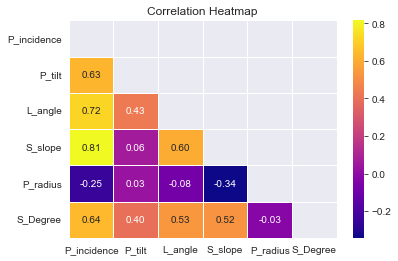

In [32]:
print(df.corr())
  
# plotting correlation heatmap
mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
  
# displaying heatmap
plt.title('Correlation Heatmap')
plt.show()

#### Part 1.3 b - Share insights on correlation

- Correlation analysis is a statistical method that identifies the strength of a relationship between two or more variables.
- The end result will be a numerical output between -1 and +1.
- Results close to +1 indicate a positive correlation, whereas outputs closer to -1 are a sign of a negative correlation.
- A value near 0 in a correlation analysis indicates a less meaningful relationship.
- Correlation between S_Degree and P_incidence have high correlation.
- S_degree and P_radius has negative correlation.

#### Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights

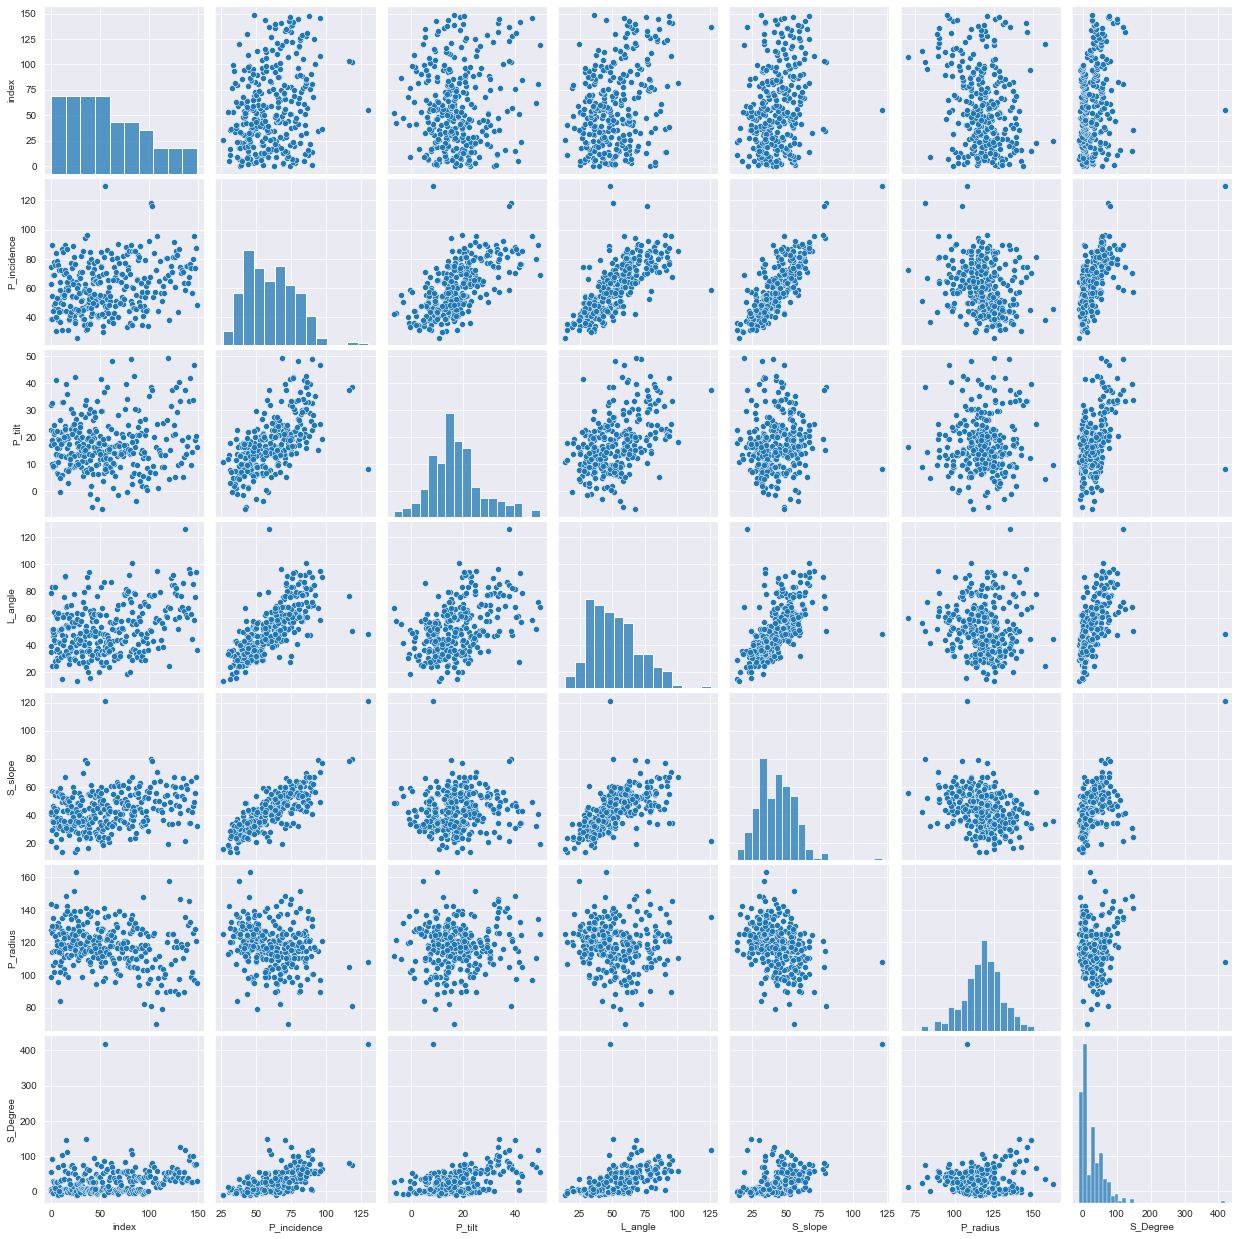

In [33]:
df = df.reset_index()
sns.pairplot(df)
plt.show()

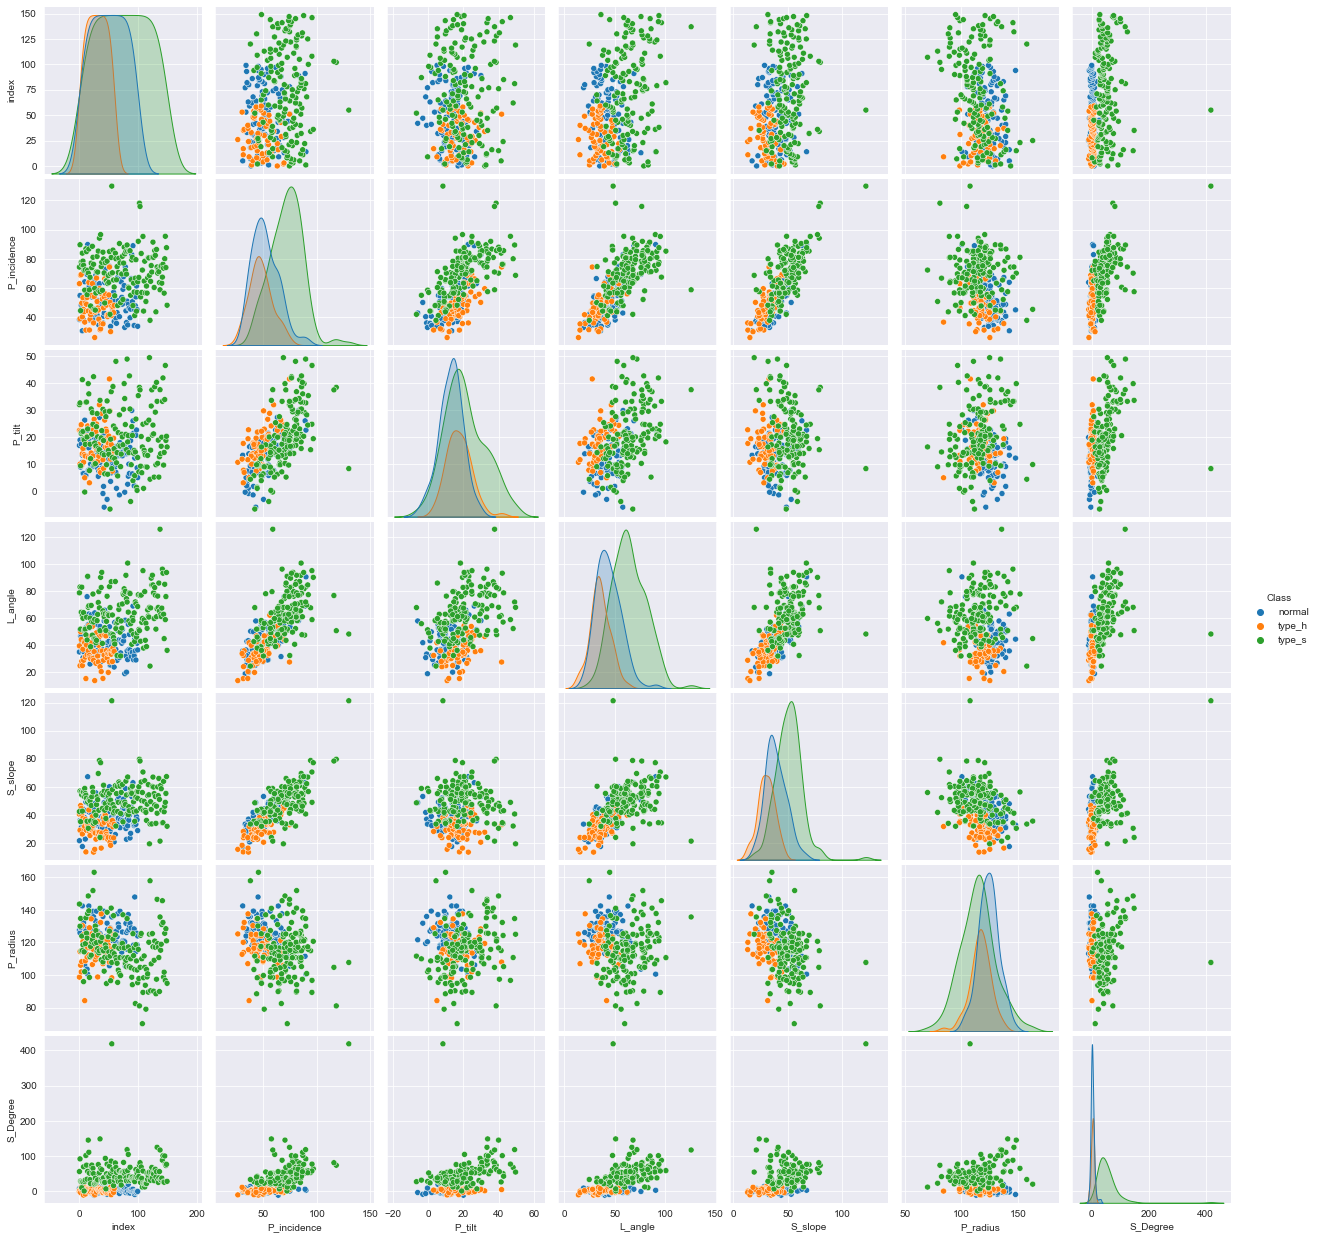

In [34]:
sns.pairplot(df,hue='Class')

In [35]:
summary_of_class=df.groupby('Class')
summary_of_class.mean().reset_index()

Class  index  P_incidence     P_tilt    L_angle    S_slope    P_radius  \
0  normal   49.5    51.685244  12.821414  43.542605  38.863830  123.890834   
1  type_h   29.5    47.638407  17.398795  35.463524  30.239612  116.474968   
2  type_s   74.5    71.514224  20.748038  64.110108  50.766186  114.518810   

    S_Degree  
0   2.186572  
1   2.480251  
2  51.896687

**Insights:**

- In the diagonal we can see distribution of variable for three claases are not same.
- type_s class is more compared to other two. 
- Normal class is more compared to type_h.
- type_s contains larger value.

#### Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

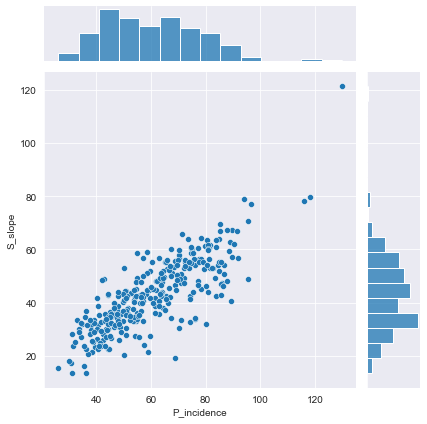

In [36]:
sns.jointplot(x = "P_incidence", y = "S_slope", data = df)
# show the plot
plt.show()

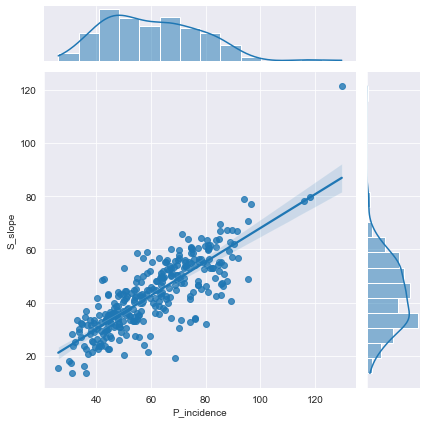

In [37]:
# draw jointplot with
sns.jointplot(x = "P_incidence", y = "S_slope",kind="reg", data = df)
# show the plot
plt.show()

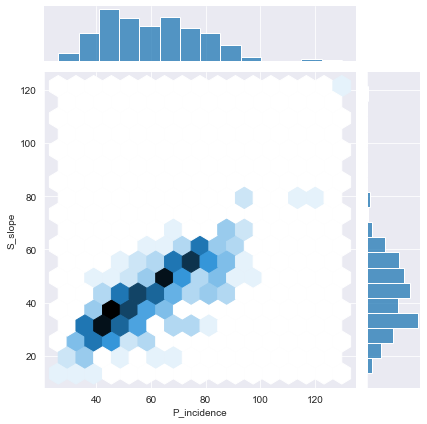

In [38]:
sns.jointplot(x = "P_incidence", y = "S_slope",kind="hex", data = df)
# show the plot
plt.show()

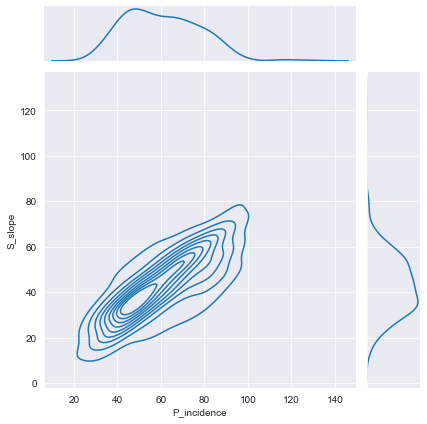

In [39]:
sns.jointplot(data=df, x="P_incidence", y="S_slope", kind="kde")

**Insights:**

- Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds.
- Using joint plot we can plot the regression line that best fits the data points.

#### Visualize a boxplot to check distribution of the features and share insights

<AxesSubplot:xlabel='P_incidence'>

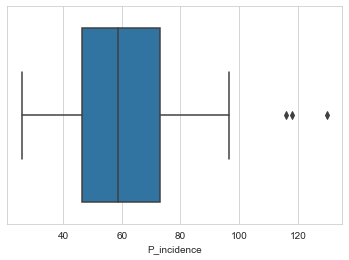

In [40]:
sns.set_style("whitegrid")
sns.boxplot(x = 'P_incidence',data = df)

<AxesSubplot:xlabel='S_slope'>

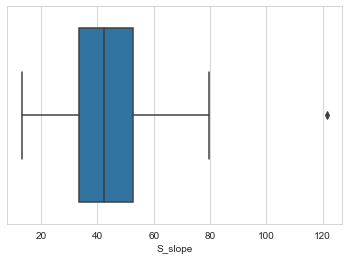

In [41]:
sns.boxplot(x = 'S_slope',data = df)

Total Number of outliers in P_incidence: 3.
Likewise we can draw for all the column.

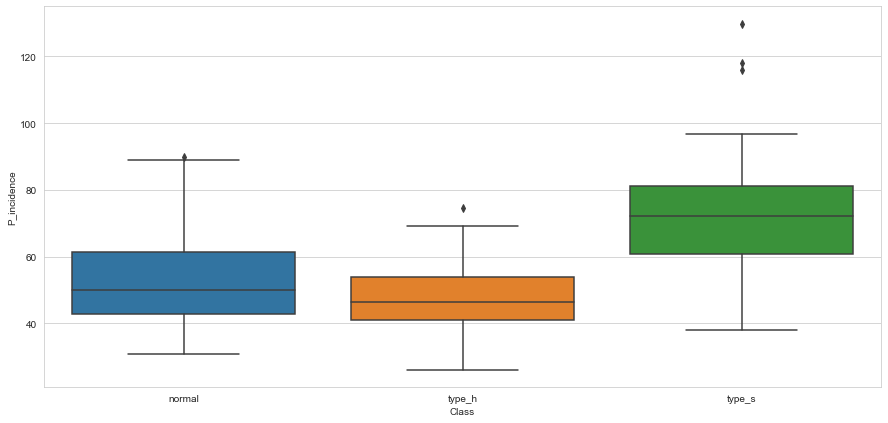

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_incidence', data= df)
plt.show()

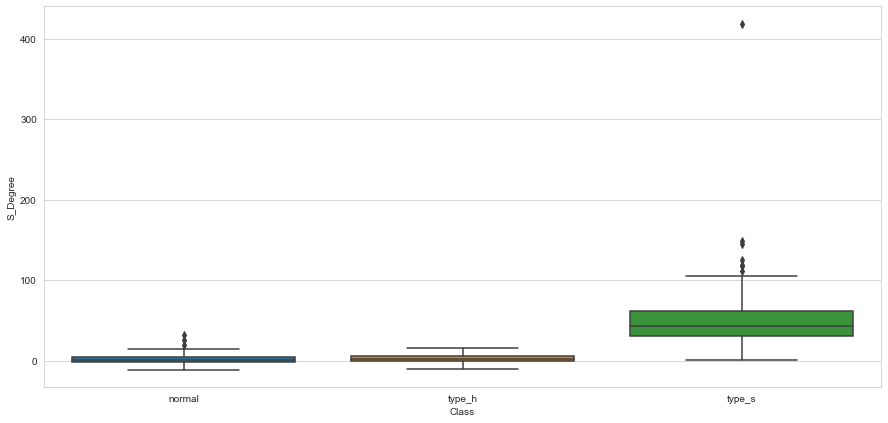

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_Degree', data= df)
plt.show()

#### Insights : 

- P_Incidence Value is large for type_s Class.Normal Value is slightly higher than type_h.
- Bottom black horizontal line of blue box plot is the min value.
- First black horizontal line of rectangle shape of blue box plot is First quartile or 25%.
- Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or    median.
- Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%.
- Top black horizontal line of rectangle shape of blue box plot is maximum value.
- Small diamond shape or black dots of all box plot is outlier data.

#### Part 1.4 a - Split data into X and Y.

In [44]:
df['Class'] = df.Class.astype('category')

In [45]:
df.describe().transpose()

count        mean        std        min         25%         50%  \
index        310.0   57.725806  39.385724   0.000000   25.250000   51.000000   
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
index         85.750000  149.000000  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082

In [46]:
df.groupby(["Class"]).count()

index  P_incidence  P_tilt  L_angle  S_slope  P_radius  S_Degree
Class                                                                   
normal    100          100     100      100      100       100       100
type_h     60           60      60       60       60        60        60
type_s    150          150     150      150      150       150       150

In [47]:
df = df.drop(labels = "index", axis = 1)

In [48]:
X=df.drop(columns='Class')
y=df['Class'] #target
X.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910

In [49]:
X.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

#### Part 1.4 b - Split data into train and test with 80:20 proportion

In [50]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

count          mean       std       min       25%       50%  \
P_incidence  310.0  1.042177e-16  1.001617 -1.996010 -0.817398 -0.104925   
P_tilt       310.0  2.096889e-16  1.001617 -2.411664 -0.688114 -0.118606   
L_angle      310.0  1.980495e-16  1.001617 -2.047652 -0.806027 -0.127862   
S_slope      310.0  2.829278e-17  1.001617 -2.207741 -0.716842 -0.040960   
P_radius     310.0 -5.071212e-16  1.001617 -3.597963 -0.542383  0.026138   
S_Degree     310.0 -1.277204e-16  1.001617 -0.996172 -0.658507 -0.387450   

                  75%        max  
P_incidence  0.719464   4.029206  
P_tilt       0.458116   3.191402  
L_angle      0.597549   3.984615  
S_slope      0.726941   5.855771  
P_radius     0.567621   3.395818  
S_Degree     0.399768  10.460350

In [51]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [52]:
X_train.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
267    72.343594  16.420790  59.869012  55.922805   70.082575  12.072644
290    43.718262   9.811985  52.000000  33.906277   88.434242  40.880923
209    68.613001  15.082235  63.014696  53.530766  123.431174  39.497987
92     54.600316  21.488974  29.360216  33.111342  118.343321  -1.471067
194    94.174822  15.380770  67.705721  78.794052  114.890113  53.255220

In [53]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

80.00% data is in training set
20.00% data is in test set


#### Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier

In [54]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean')

In [55]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [56]:
print('Accuracy on Training data:',KNN.score(X_train, y_train))
print('Accuracy on Test data:',KNN.score(X_test, y_test))

Accuracy on Training data: 0.9153225806451613
Accuracy on Test data: 0.7096774193548387


#### Part 1.4 d - Print all the possible performance metrics for both train and test data

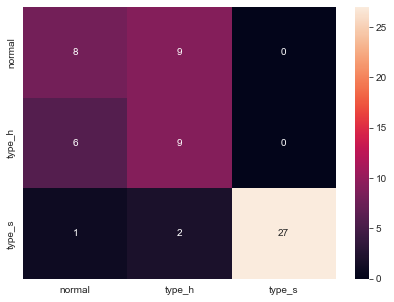

In [57]:
cm = confusion_matrix(y_test, predicted_labels)

df_cm = pd.DataFrame(cm, index = [i for i in ["normal","type_h","type_s"]],
                  columns = [i for i in ["normal","type_h","type_s"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [58]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      normal       0.53      0.47      0.50        17
      type_h       0.45      0.60      0.51        15
      type_s       1.00      0.90      0.95        30

    accuracy                           0.71        62
   macro avg       0.66      0.66      0.65        62
weighted avg       0.74      0.71      0.72        62



- By F1 score we can say that precison and recall is balanced for class normal by 50% and for class type_h by 51 %
- We have maximum F1 score for class type_s class.

#### Part 1.5 a - Experiment with various parameters to improve performance of the base model

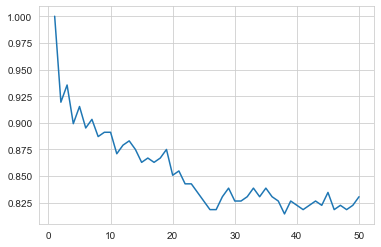

In [59]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))
plt.plot(range(1,51),train_score)
plt.show()

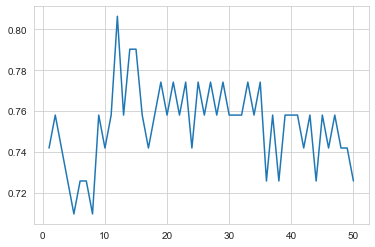

In [60]:
plt.plot(range(1,51),test_score)
plt.show()

**The maximum accuracy occures when k is less than 20.**

In [61]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7419354838709677:
Accuracy on Training data for k 3 is 0.9354838709677419:
Accuracy on Test data for k 3 is 0.7419354838709677:
Accuracy on Training data for k 5 is 0.9153225806451613:
Accuracy on Test data for k 5 is 0.7096774193548387:
Accuracy on Training data for k 7 is 0.9032258064516129:
Accuracy on Test data for k 7 is 0.7258064516129032:
Accuracy on Training data for k 9 is 0.8911290322580645:
Accuracy on Test data for k 9 is 0.7580645161290323:
Accuracy on Training data for k 11 is 0.8709677419354839:
Accuracy on Test data for k 11 is 0.7580645161290323:
Accuracy on Training data for k 13 is 0.8830645161290323:
Accuracy on Test data for k 13 is 0.7580645161290323:
Accuracy on Training data for k 15 is 0.8629032258064516:
Accuracy on Test data for k 15 is 0.7903225806451613:
Accuracy on Training data for k 17 is 0.8629032258064516:
Accuracy on Test data for k 17 is 0.7419354838709677:
Accuracy on Train

#### Part 1.5 b - Clearly showcase improvement in performance achieved

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.864516 (0.049556)
KNN: 0.829032 (0.054074)
NB: 0.825806 (0.035921)
SVM-linear: 0.848387 (0.066188)
SVM-poly: 0.819355 (0.050389)
SVM-rbf: 0.483871 (0.070674)


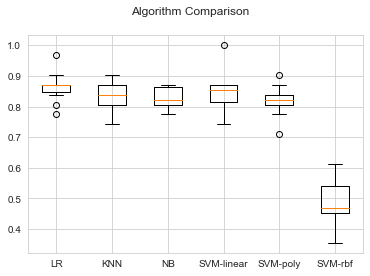

In [67]:
seed = 7
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Part 1.5 c - Clearly state which parameters contributed most to improve model performance.

- When the scaled values are used instead of normal values Logistic regression is performing well.
- Logistic Regression gives 81% accuracy with little standard deviation.

## Part B
### • CONTEXT: 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are 
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more 
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation 
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to 
increase the conversion ratio to double digit with same budget as per last campaign. 

#### Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [70]:
data_set1=pd.read_csv(r'C:\Users\Datta\Downloads\Part2+-+Data1.csv')
data_set1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [71]:
data_set2=pd.read_csv(r'C:\Users\Datta\Downloads\Part2+-Data2.csv')
data_set2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

#### Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes.

In [72]:
#Shape of the dataset data_set1
data_set1.shape

(5000, 8)

In [73]:
#Shape of the dataset data_set2
data_set2.shape

(5000, 7)

In [74]:
#Column of the dataset data_set1
data_set1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [75]:
#Column of the dataset data_set2
data_set2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [76]:
#Data Types of the dataframe data_set1
data_set1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [77]:
#Data Types of the dataframe data_set2
data_set2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

#### Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [78]:
dataframe_new = pd.merge(data_set1, data_set1, on="ID",how="outer")
dataframe_new

ID  Age_x  CustomerSince_x  HighestSpend_x  ZipCode_x  HiddenScore_x  \
0        1     25                1              49      91107              4   
1        2     45               19              34      90089              3   
2        3     39               15              11      94720              1   
3        4     35                9             100      94112              1   
4        5     35                8              45      91330              4   
...    ...    ...              ...             ...        ...            ...   
4995  4996     29                3              40      92697              1   
4996  4997     30                4              15      92037              4   
4997  4998     63               39              24      93023              2   
4998  4999     65               40              49      90034              3   
4999  5000     28                4              83      92612              3   

      MonthlyAverageSpend_x  Level_x  Age_y  CustomerSince_y  HighestSpend_y  \
0                       1.6        1     25                1              49   
1                       1.5        1     45               19              34   
2                       1.0        1     39               15              11   
3                       2.7        2     35                9             100   
4                       1.0        2     35                8              45   
...                     ...      ...    ...              ...             ...   
4995                    1.9        3     29                3              40   
4996                    0.4        1     30                4              15   
4997                    0.3        3     63               39              24   
4998                    0.5        2     65               40              49   
4999                    0.8        1     28                4              83   

      ZipCode_y  HiddenScore_y  MonthlyAverageSpend_y  Level_y  
0         91107              4                    1.6        1  
1         90089              3                    1.5        1  
2         94720              1                    1.0        1  
3         94112              1                    2.7        2  
4         91330              4                    1.0        2  
...         ...            ...                    ...      ...  
4995      92697              1                    1.9        3  
4996      92037              4                    0.4        1  
4997      93023              2                    0.3        3  
4998      90034              3                    0.5        2  
4999      92612              3                    0.8        1  

[5000 rows x 15 columns]

In [79]:
# with all the ID's that match in both the Dataframe
dataframe_new = pd.merge(data_set1, data_set2, on="ID", how="inner")
dataframe_new.head(10)

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   
5   6   37             13            29    92121            4   
6   7   53             27            72    91711            2   
7   8   50             24            22    93943            1   
8   9   35             10            81    90089            3   
9  10   34              9           180    93023            1   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   
5                  0.4      2       155         0                    0   
6                  1.5      2         0         0                    0   
7                  0.3      3         0         0                    0   
8                  0.6      2       104         0                    0   
9                  8.9      3         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN  
5                1           0         NaN  
6                1           0         NaN  
7                0           1         NaN  
8                1           0         NaN  
9                0           0         1.0

In [80]:
#dataframe_new['LoanOnCard'] = dataframe_new['LoanOnCard'].fillna(0)
dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


#### Part 2.1 d - Change Datatype of below features to ‘Object’

In [81]:
dataframe_new["CreditCard"] = dataframe_new['CreditCard'].astype('object')
dataframe_new["InternetBanking"] = dataframe_new['InternetBanking'].astype('object')
dataframe_new["FixedDepositAccount"] = dataframe_new['FixedDepositAccount'].astype('object')
dataframe_new["Security"] = dataframe_new['Security'].astype('object')
dataframe_new["Level"] = dataframe_new['Security'].astype('object')
dataframe_new["HiddenScore"] = dataframe_new['Security'].astype('object')
dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


#### Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

In [82]:
# Five point summary of numerical attributes
dataframe_new.describe().T

count          mean          std     min       25%  \
ID                   5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                  5000.0     45.338400    11.463166    23.0     35.00   
CustomerSince        5000.0     20.104600    11.467954    -3.0     10.00   
HighestSpend         5000.0     73.774200    46.033729     8.0     39.00   
ZipCode              5000.0  93152.503000  2121.852197  9307.0  91911.00   
MonthlyAverageSpend  5000.0      1.937938     1.747659     0.0      0.70   
Mortgage             5000.0     56.498800   101.713802     0.0      0.00   
LoanOnCard           4980.0      0.096386     0.295149     0.0      0.00   

                         50%       75%      max  
ID                    2500.5   3750.25   5000.0  
Age                     45.0     55.00     67.0  
CustomerSince           20.0     30.00     43.0  
HighestSpend            64.0     98.00    224.0  
ZipCode              93437.0  94608.00  96651.0  
MonthlyAverageSpend      1.5      2.50     10.0  
Mortgage                 0.0    101.00    635.0  
LoanOnCard               0.0      0.00      1.0

C:\Users\Datta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


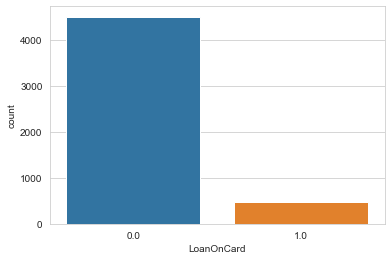

In [83]:
sns.countplot(dataframe_new['LoanOnCard'])
plt.show()
#sns.barplot(x='CreditCard',y='LoanOnCard', data=dataframe_new)

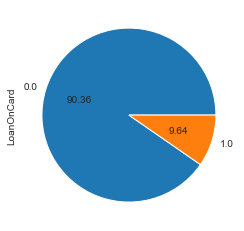

In [84]:
dataframe_new['LoanOnCard'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [85]:
sns.pairplot(dataframe_new, hue='LoanOnCard')

**Insights:**

- LoanOnCard value is either 0 or 1.
- 9.64% customer took loan on credit card.
- 90.3% did not take loan on credit card.
- The average age group of customer is 45.


#### Part 2.2 b - Check the percentage of missing values and impute if required

In [86]:
dataframe_new.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [87]:
dataframe_new.dropna(axis=0,inplace=True)
dataframe_new.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

#### Part 2.2 c - Check for unexpected values in each categorical variable and impute with best suitable value.

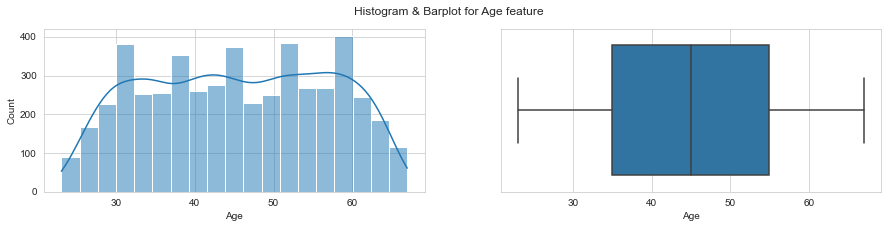

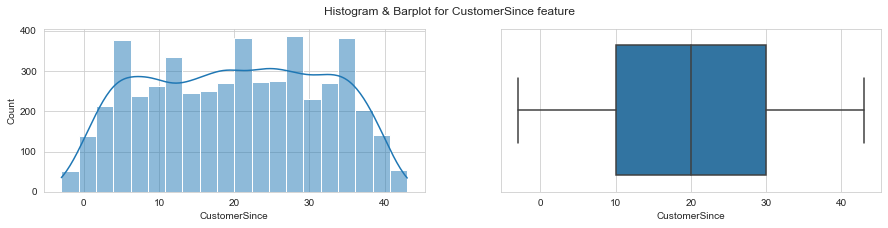

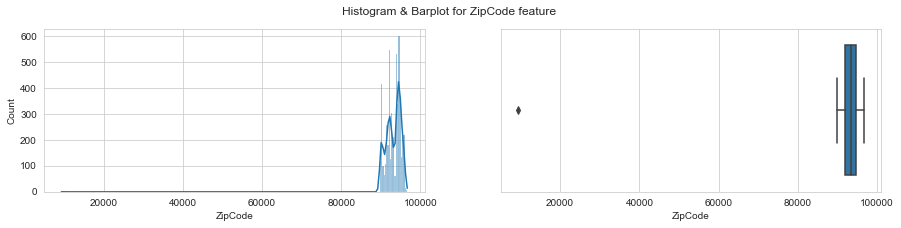

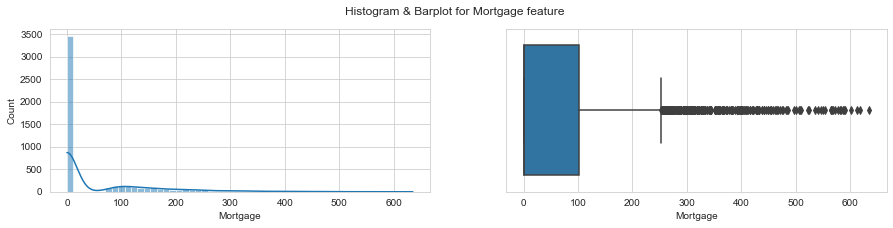

In [88]:
num_cols = dataframe_new.select_dtypes(exclude='object').columns.to_list()
for i in num_cols:
    fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,3))
    plt.suptitle("Histogram & Barplot for {} feature".format(i), ha='center')
    sns.histplot(data=dataframe_new,x=i,ax=ax[0],fill=True, kde=True)
    sns.boxplot(data=dataframe_new,x=i,ax=ax[1])

- Age : Most of the customers are between the age 35 to 55.
- CustomerSince : Normally distributed data.Mean is 20. Most of customer are between 10 and 30.
- HighestSpend : Values are between 0 and 200 with right skew.
- ZipCode : This is contineous.
- MonthlyAverageSpend : Values are distributed around 0 to 10,with right skewn. outliers are available around 6 values.
- Mortgage : Values are spreaded around 0 to 100.

In [89]:
dataframe_new.drop(['ID'], axis=1, inplace=True)

In [90]:
cat=dataframe_new.select_dtypes(include='object').columns.to_list()
fig, ax= plt.subplots(nrows=3, ncols=3, figsize=(16,8),)
ax=ax.flatten()
j=0
for i in cat:
    ax[j].set_title("Count plot on '{}' feature".format(i))
    sns.countplot(data=dataframe_new, x=i, ax=ax[j])
    j=j+1

#### Part 2.3 a- Split data into X and Y

In [91]:
# Separating dependent and independent variables
X = dataframe_new.drop(['LoanOnCard'], axis = 1)
y = dataframe_new['LoanOnCard']

display(X.describe().T, X.shape, y.shape)

count          mean          std     min      25%  \
Age                  4980.0     45.352610    11.464212    23.0     35.0   
CustomerSince        4980.0     20.117671    11.468716    -3.0     10.0   
HighestSpend         4980.0     73.852410    46.070090     8.0     39.0   
ZipCode              4980.0  93152.420482  2123.660073  9307.0  91911.0   
MonthlyAverageSpend  4980.0      1.939536     1.750006     0.0      0.7   
Mortgage             4980.0     56.589759   101.836758     0.0      0.0   

                         50%        75%      max  
Age                     45.0     55.000     67.0  
CustomerSince           20.0     30.000     43.0  
HighestSpend            64.0     98.000    224.0  
ZipCode              93407.0  94608.000  96651.0  
MonthlyAverageSpend      1.5      2.525     10.0  
Mortgage                 0.0    101.000    635.0

(4980, 12)

(4980,)

#### Part 2.3 b - Split data into train and test. Keep 25% data reserved for testing

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3735, 12)

(1245, 12)

(3735,)

(1245,)

In [93]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(dataframe_new.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(dataframe_new.index)) * 100))

75.00% data is in training set
25.00% data is in test set


In [94]:
X_train.head()

Age  CustomerSince  HighestSpend  ZipCode HiddenScore  \
740    52             27           195    90266           0   
368    63             37            30    92054           0   
2296   27              3            82    94305           0   
2788   45             20            30    96003           0   
1143   33              7           120    94022           0   

      MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount  \
740                   8.1     0         0        0                   0   
368                   1.0     0       159        0                   0   
2296                  0.2     0         0        0                   0   
2788                  0.1     0         0        0                   0   
1143                  3.2     0         0        0                   0   

     InternetBanking CreditCard  
740                0          0  
368                1          0  
2296               0          1  
2788               1          0  
1143               1          0

#### Part 2.3 c - Train a Supervised Learning Classification base model - Logistic Regression

Accuracy score Traing dataset:0.92
Accuracy score Traing dataset:0.92
Accuracy score:0.92
Log loss:2.75
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1118
         1.0       0.69      0.40      0.51       127

    accuracy                           0.92      1245
   macro avg       0.81      0.69      0.73      1245
weighted avg       0.91      0.92      0.91      1245



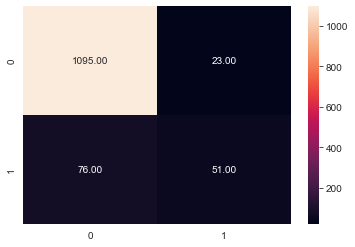

In [95]:
reg = LogisticRegression()

#Try with dataset before downsampling
df1_no_sample = dataframe_new.drop(['Security','InternetBanking','CreditCard','Age','CustomerSince','ZipCode'], axis=1)
X1=df1_no_sample.drop('LoanOnCard', axis=1)
y1=df1_no_sample['LoanOnCard']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=10)

reg.fit(X_train1, y_train1)
pred=reg.predict(X_test1)

print("Accuracy score Traing dataset:{:.2f}".format(reg.score(X_train1, y_train1)))
print("Accuracy score Traing dataset:{:.2f}".format(reg.score(X_test1, y_test1)))
print("Accuracy score:{:.2f}".format(accuracy_score(y_test1, pred)))
print("Log loss:{:.2f}".format(log_loss(y_test1, pred)))
sns.heatmap(confusion_matrix(y_test1, pred), annot=True, fmt='.2f')
print(classification_report(y_test1,pred))

Accuracy score:91.41 %
Log loss:2.97
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1118
         1.0       0.64      0.37      0.47       127

    accuracy                           0.91      1245
   macro avg       0.78      0.67      0.71      1245
weighted avg       0.90      0.91      0.90      1245



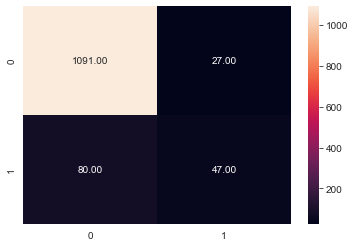

In [96]:
reg.fit(X_train, y_train)
pred=reg.predict(X_test)

print("Accuracy score:{:.2f} %".format(accuracy_score(y_test, pred)*100))
print("Log loss:{:.2f}".format(log_loss(y_test, pred)))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(classification_report(y_test,pred))

#### Part 2.3 d - Print evaluation metrics for the model and clearly share insights. 

In [97]:
print("Accuracy score:{:.2f} %".format(accuracy_score(y_test, pred)*100))
#sns.heatmap(confusion_matrix(y_test, reg), annot=True, fmt='.2f')
#print(classification_report(y_test,reg))

Accuracy score:91.41 %


**Insights:**

- The accuracy score reduced from 92% to 91%, we can say that the model is peforming well in balanced data.
- From the above classification report, Precission : we are predicting 93% of 0 .i.e No loan on card and 64% of times as Loan on card in the data set.
- Recall : our model can predict 98% No loan on card and 37% of times as Loan on card from test dataset.

#### Part 2.3 e - Balance the data using the right balancing technique.

Accuracy score Traing dataset:0.87%
Accuracy score Traing dataset:0.87%
Accuracy score: test vs Predicion: 0.87%
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      1118
         1.0       0.42      0.61      0.50       127

    accuracy                           0.87      1245
   macro avg       0.69      0.76      0.71      1245
weighted avg       0.90      0.87      0.88      1245



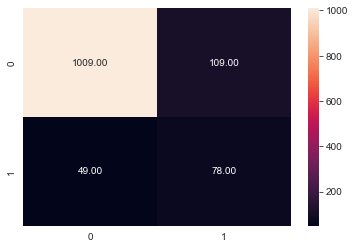

In [98]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB, BernoulliNB,CategoricalNB,ComplementNB
model = GaussianNB()
model.fit(X_train, y_train)
pred=model.predict(X_test)
print("Accuracy score Traing dataset:{:.2f}%".format(model.score(X_train, y_train)))
print("Accuracy score Traing dataset:{:.2f}%".format(model.score(X_test, y_test)))
print("Accuracy score: test vs Predicion: {:.2f}%".format(accuracy_score(y_test, pred)))

sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(classification_report(y_test,pred))

#### Part 2.3 g- Print evaluation metrics and clearly share differences observed

**Accuracy, confusion matrix, log-loss, and AUC-ROC are some of the most popular metrics**


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1118
         1.0       0.64      0.37      0.47       127

    accuracy                           0.91      1245
   macro avg       0.78      0.67      0.71      1245
weighted avg       0.90      0.91      0.90      1245


Confusion Matrix:
 [[1091   27]
 [  80   47]]

Accuracy Score:
 0.914


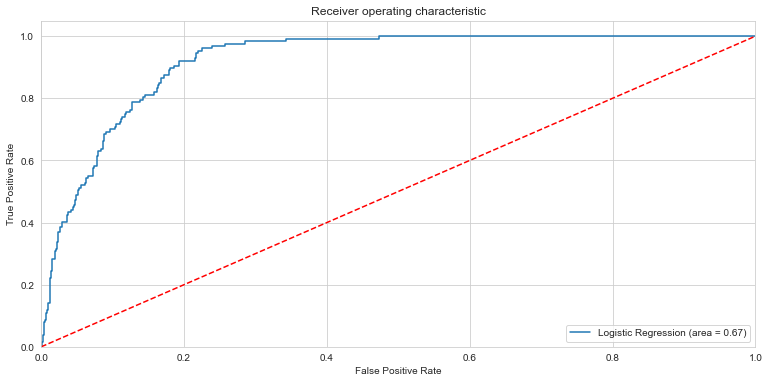

In [99]:
y_true, y_pred = y_test, reg.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_roc_auc = roc_auc_score(y_true, reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, reg.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(LR_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Part 2.4 a- Train a base model each for SVM, KNN

In [100]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [101]:
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.8979919678714859


array([[1118,    0],
       [ 127,    0]], dtype=int64)

k-Nearest Neighbor Classifier Scores without feature scaling


k-NN accuracy for train set: 0.926
k-NN accuracy for test set: 0.900

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1118
         1.0       0.52      0.27      0.35       127

    accuracy                           0.90      1245
   macro avg       0.72      0.62      0.65      1245
weighted avg       0.88      0.90      0.89      1245


Confusion Matrix:
 [[1087   31]
 [  93   34]]

Accuracy Score:
 0.9


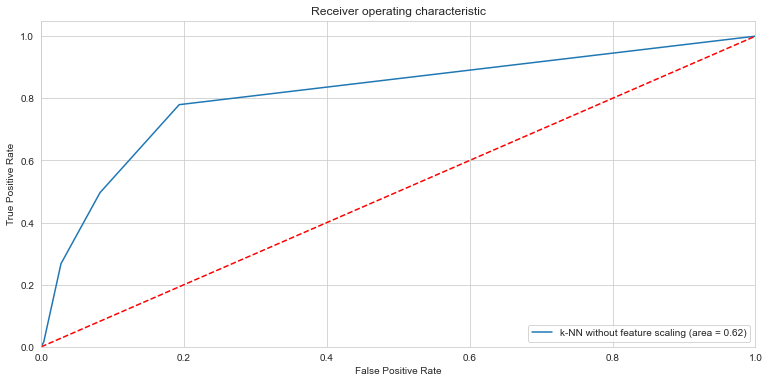

In [102]:
# KNN Model without scaling the features
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores without feature scaling\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN.score(X_test, y_test)))
y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))
# ROC Curve
KNN_roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN without feature scaling (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [103]:
#Xs = X.apply(zscore)
#display(Xs.describe().T, Xs.shape, y.shape)
# Splitting the data into training and test set in the ratio of 70:30 respectively
#X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.25, random_state = 42)
#display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning


k-NN accuracy for train set: 0.926
k-NN accuracy for test set: 0.900

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1118
         1.0       0.52      0.27      0.35       127

    accuracy                           0.90      1245
   macro avg       0.72      0.62      0.65      1245
weighted avg       0.88      0.90      0.89      1245


Confusion Matrix:
 [[1087   31]
 [  93   34]]

Accuracy Score:
 0.9


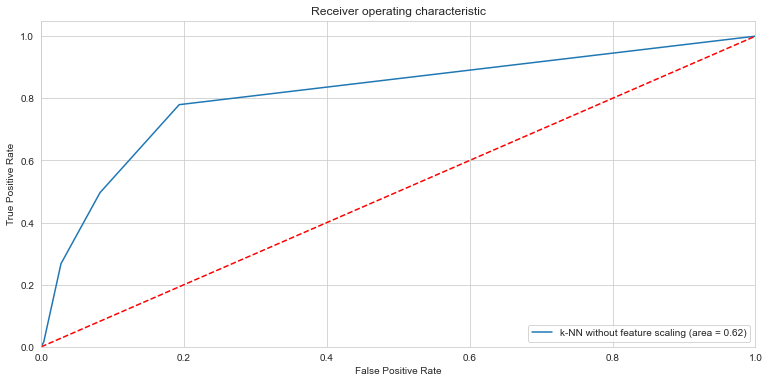

In [104]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve

KNN_roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN without feature scaling (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Part 2.4 b - Tune parameters for each of the models wherever required and finalize a mode

In [105]:
# KNN with hyperparameter tuning
KNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1)

KNN_hyper.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))
print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_hyper_roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN feature scaled and hyperparameter tuned (area = {})'.\
         format(KNN_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 35, 'weights': 'uniform'}

Best Score is:  0.905
k-NN accuracy for train set: 0.905
k-NN accuracy for test set: 0.900

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1118
         1.0       1.00      0.02      0.03       127

    accuracy                           0.90      1245
   macro avg       0.95      0.51      0.49      1245
weighted avg       0.91      0.90      0.85      1245


Confusion Matrix:
 [[1118    0]
 [ 125    2]]

Accuracy Score:
 0.9


Naive Bayes Classifier Scores


NB accuracy for train set: 0.875
NB accuracy for test set: 0.873

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      1118
         1.0       0.42      0.61      0.50       127

    accuracy                           0.87      1245
   macro avg       0.69      0.76      0.71      1245
weighted avg       0.90      0.87      0.88      1245


Confusion Matrix:
 [[1009  109]
 [  49   78]]

Accuracy Score:
 0.873


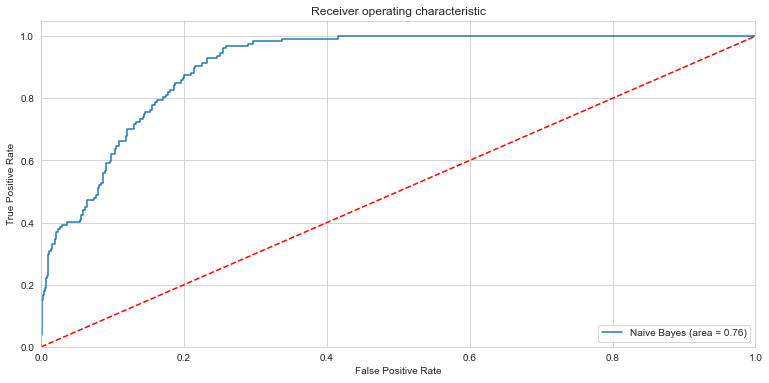

In [106]:
# Naive Bayes Model
NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes Classifier Scores\n\n')
print('NB accuracy for train set: {0:.3f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
NB_roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Part 2.4 c- Print evaluation metrics for final mode

LR: 0.906627 (0.008243)
KNN: 0.899398 (0.011088)
NB: 0.874699 (0.011988)


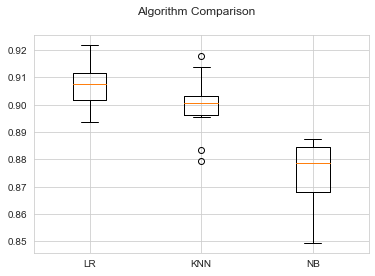

In [107]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- Without doing any sampling using k-fold we are getiing good accuracy score in logistic regresssion.
- Naive bayes performance is less compared to others.

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.906426 (0.009123)
KNN: 0.899598 (0.007931)
NB: 0.873896 (0.012142)


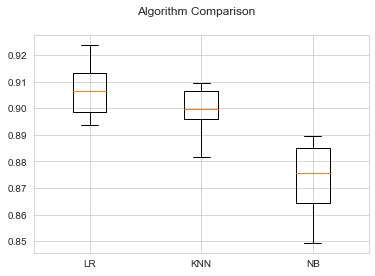

In [108]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Part 2.4 d- Share improvement achieved from base model to final model

- Final model as logistic regression as it performs well in training and testing test.
- Logistic regression performed well in k-fold cross validation as well.
- Few customers does't have credit card but those customer having loan on card. This data error can be avoid.
- Sampling improved to predict minority classes as well.
- They do not take into account the class distribution of classes. In the dataset, the percentage of customer took loan on credit card (class 1) is 9.6% whereas 90.4% of customers didn't take the loan on credit card (class 0).
- The confusion matrix is another metric that is often used to measure the performance of a classification algorithm, which contains information about the actual and the predicted class.
- Precision would tell us cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.
- Recall would tell us cases where actually the personal was accepted by the customer but we predicted it as not accepted.
- Non-parametric algorithm which means there are no assumptions to be met to implement k-NN. Parametric models like logistic regression has lots of assumptions to be met by data before it can be implemented which is not the case with k-NN.